In [52]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Part I: Analyzing US baby name trends

The SSA has made available data on the frequency of baby names from 1880 through 2021 (at the time of this writing).
The raw data can be obtained from [the SSA webpage](https://www.ssa.gov/oact/babynames/limits.html) (there is one file per year).

**Part 0:** Download the [National Data](https://www.ssa.gov/oact/babynames/names.zip) file *names.zip* and unzip it.

**Part 1** Assemble all of the data into a single DataFrame and add a *year* field. 
You can do this using [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [53]:
years = list(range(1880,2021))

In [54]:
df_list = []
for year in years:
    # load the dataset into a dataframe
    df = pd.read_csv('names\yob'+str(year)+'.txt',header=None,names=['name','sex','births'])
    # add year column
    df['year'] = year
    # put dataframe in df_list
    df_list.append(df)
names = pd.concat(df_list)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


**Part 2:** Plot the total births by sex and year

<AxesSubplot:xlabel='year'>

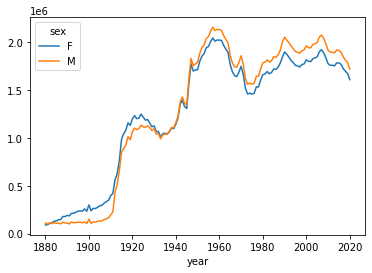

In [184]:
names.groupby(['year','sex']).births.sum().unstack(level=1).plot()

In [314]:
#names.plot(x='year', y='births') # incorrect probably

<AxesSubplot:xlabel='year'>

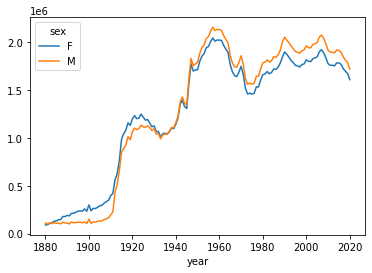

In [57]:
names.groupby(['sex', 'year']).births.sum().unstack(level=0).plot()

**Part 3:** Plot the number of babies given a particular name (your own, or another name) by year.

<AxesSubplot:xlabel='year'>

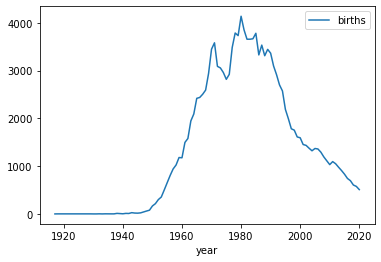

In [21]:
names[(names.name=='Derrick') & (names.sex=='M')].plot(x='year', y='births')

**Part 4:** Insert a column 'prop' with the relative frequency of each name in each of the years.

In [187]:
# Get names in a year, calculate frequency
def get_prop(group):
    total = group.births.sum()
    group['prop'] = group.births/total
    return group

In [188]:
names = names.groupby(['year','sex']).apply(get_prop)

In [189]:
names

,name,sex,births,year,lastLetter,prop
0,Mary,F,7065,1880,y,0.077642
1,Anna,F,2604,1880,a,0.028617
2,Emma,F,2003,1880,a,0.022012
3,Elizabeth,F,1939,1880,h,0.021309
4,Minnie,F,1746,1880,e,0.019188
...,...,...,...,...,...,...
31448,Zykell,M,5,2020,l,0.000003
31449,Zylus,M,5,2020,s,0.000003
31450,Zymari,M,5,2020,i,0.000003
31451,Zyn,M,5,2020,n,0.000003


**Part 5**: Create a DataFrame 'top1000_names' that contains the top 1000 names for each sex/year combination.
You will use this top 1000 dataset in the following investigations into the data.

In [36]:
def get_top1000(group):
    return group.sort_values(by='prop', ascending=False).head(1000)

In [193]:
female_names = names.groupby(['sex', 'year']).apply(get_top1000).loc['F'].reset_index(drop=True)
male_names = names.groupby(['sex', 'year']).apply(get_top1000).loc['M'].reset_index(drop=True)

In [194]:
male_names

,name,sex,births,year,lastLetter,prop
0,John,M,9655,1880,n,0.087383
1,William,M,9532,1880,m,0.086270
2,James,M,5927,1880,s,0.053643
3,Charles,M,5348,1880,s,0.048403
4,George,M,5126,1880,e,0.046393
...,...,...,...,...,...,...
140991,Jericho,M,213,2020,o,0.000124
140992,Harris,M,213,2020,s,0.000124
140993,Rogelio,M,212,2020,o,0.000123
140994,Jerome,M,211,2020,e,0.000123


**Part 6**: Plot the number of Johns, Harrys, Marys, and Marilyns by year.

<AxesSubplot:xlabel='year'>

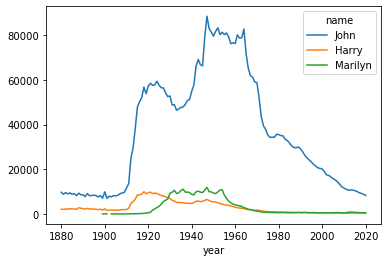

In [339]:
#fig, ax = plt.subplots()
#first = names[(names.name=='John') & (names.sex=='M')].plot(x='year', y='births', label='John',ax=ax)
#second = names[(names.name=='Harry') & (names.sex=='M')].plot(x='year', y='births',ax=ax, label='Harry')
#third = names[(names.name=='Marilyn') & (names.sex=='F')].plot(x='year', y='births',ax=ax, label='Marilyn')

# A way to do same plot above but with a single line. This does not account for gender but it should be fine
names.pivot_table(values='births',index='year',columns='name',aggfunc='sum')[['John','Harry', 'Marilyn']].plot()

Looking at your plots, you might conclude that these names have grown out of favor with the American population. 
But the story is more complicated than that, as you will explore in the next part.

## Measuring the increase in naming diversity

One explanation for the decrease in plots is that fewer parents are choosing common names for their children.
One measure of naming diversity is the proportion of births represented by the top 1000 most popular names.

**Part 7**: Plot the proportion of the top 1000 names by year and sex

<AxesSubplot:xlabel='year'>

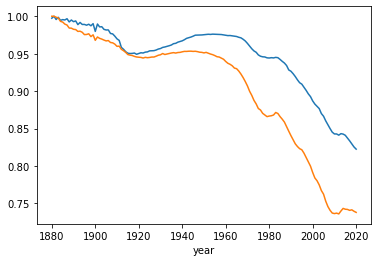

In [207]:
fig, ax = plt.subplots()

male_names.groupby('year').prop.sum().plot(ax=ax, label='Males')
female_names.groupby('year').prop.sum().plot(ax=ax, label='Females')


In [203]:
#names.sort_values('births',ascending=False).head(1000).plot.scatter(x='year', y='births', title='top 1000 birthed names by year')

In [204]:
#names.sort_values('births',ascending=False).head(1000).plot.scatter(x='sex', y='births', title='top 1000 birthed names by sex')

## 10 most popular 2017 names through the ages

**Part 8**: Find the 10 most popular female names in 2017

In [197]:
top2017FemaleNames = names[(names.sex=='F') & (names.year==2017)].sort_values('births',ascending=False).head(10)
top2017FemaleNames

,name,sex,births,year,lastLetter,prop
0,Emma,F,19847,2017,a,0.011519
1,Olivia,F,18753,2017,a,0.010884
2,Ava,F,15998,2017,a,0.009285
3,Isabella,F,15222,2017,a,0.008834
4,Sophia,F,14910,2017,a,0.008653
5,Mia,F,13496,2017,a,0.007833
6,Charlotte,F,12955,2017,e,0.007519
7,Amelia,F,11852,2017,a,0.006879
8,Evelyn,F,10737,2017,n,0.006231
9,Abigail,F,10629,2017,l,0.006169


**Part 9**: Plot the proportions of the 10 most popular female names in 2017 by year

clarification: Of the top names from 2017, plot them throughout the years.

<AxesSubplot:xlabel='year'>

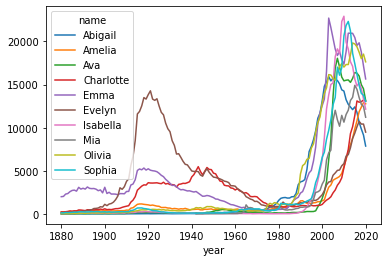

In [341]:
nameList = top2017FemaleNames.name
names[(names.sex=='F') & (names.name.isin(nameList))].pivot_table(values='births',index='year',columns='name',aggfunc='sum').plot() # continue here, get 10 plots

## Similarity between decades

Here, you will explore the similarity between the set of names given in one particular year and the set of names given 10 years previosly.

The **Jaccard similarity** between sets A and B is the number of
elements in both A and B relative to the number of elements in either A or
B. 
If we let |A| denote the number of elements in the set A, then the Jaccard
similarity is

$$
J(A,B)=\frac{|A \cap B|}{|A\cup B|}
$$

**Part 10**: Find the Jaccard similarity between the following two sets

In [350]:
set1 = {'John','Daniel','Drogo'}
set2 = {'Robert', 'John'}
set1

{'Daniel', 'Drogo', 'John'}

In [337]:
len(set1.intersection(set2))/len(set1.union(set2))

0.25

**Part 11**: Compute the Jaccard similarity between the set of male names given in 2017 and the set of male names given in 2007

In [359]:
set1= set(names.loc[names.year==2017].name.unique())
set2=set(names.loc[names.year==2007].name.unique())

len(set1.intersection(set2))/len(set1.union(set2))

0.5211188743092241

In [360]:
def get_jaccard_similarity(year):
    set1= set(names.loc[names.year==year].name.unique())
    set2=set(names.loc[names.year==year-10].name.unique())
    
    return len(set1.intersection(set2))/len(set1.union(set2))
print('Jaccard similarity 2017:',get_jaccard_similarity(2017))
print('Jaccard similarity 2007:',get_jaccard_similarity(2007))

Jaccard similarity 2017: 0.5211188743092241
Jaccard similarity 2007: 0.48987496425693416


**Part 12**: Plot the Jaccard similarity between the set of male names given in one particular year and the set of male names given 10 years previosly by year

In [361]:
similarityList = []
years = names.year.unique()
for year in years:
    if year >= 1890: # only start doing when it can be calculated from before
        similarityList.append(get_jaccard_similarity(year))
        

In [368]:
similarityTable = pd.DataFrame(years)
similarityTable = similarityTable.tail(-10) # Makes up for offset from loop above.

In [369]:
similarityTable['jaccard_value'] = similarityList

<AxesSubplot:xlabel='0'>

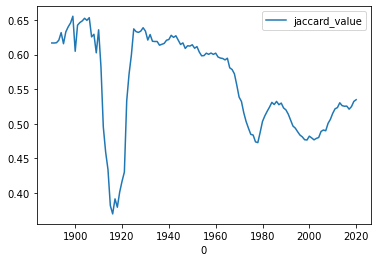

In [372]:
similarityTable.set_index(0).plot()

### Whoa, there is a big dip in the 1920s!

##  The last letter revolution

It has been argued (see [here](https://www.babynamewizard.com/archives/2007/7/where-all-boys-end-up-nowadays), for example) that the distribution of boy names by final letter has changed significantly over the last 100 years.

**Part 13:** Extract the last letter from the "name" column

In [373]:
# setup a last letter column
def get_last_letter(name):
    return name[-1]
names['lastLetter'] = names.name.apply(get_last_letter)

**Part 14**: Plot the proportion of male names by the last letter for the years 1910, 1960, and 2010

In [ ]:
df.set_index('Date', inplace=True)
df.groupby('ticker')['adj_close'].plot(legend=True)

<AxesSubplot:xlabel='lastLetter'>

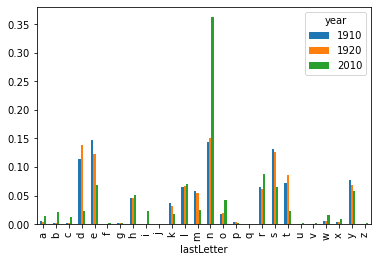

In [381]:
years =[1910,1920,2010]
myTable = names[(names.year.isin(years)) & (names.sex == 'M')].pivot_table(values='prop',index='lastLetter',columns='year',aggfunc='sum')
myTable.plot.bar()

**Part 15**: Plot the proportions of male names ending in "e", "n", "d", "s" and "y" by year.

<AxesSubplot:xlabel='year'>

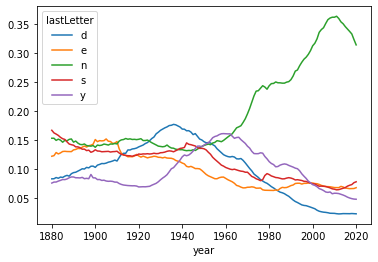

In [387]:
lastLetterList = ['e', 'n', 'd', 's', 'y']
myTable = names[(names.lastLetter.isin(lastLetterList)) & (names.sex == 'M')].pivot_table(values='prop',index='year',columns='lastLetter',aggfunc='sum')
myTable.plot()
#names[(names.lastLetter.isin(lastLetterList)) & (names.sex == 'M')].set_index('year').groupby('lastLetter')['prop'].plot(legend=True, linestyle='none', marker='.')

#### Pivot tables seem really good for making these plots. Something to cement in my mind